<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/ex%201%20credit%20card%20fraud%20dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term


Total time spanning: 0.1 days
0.050 % of all transactions are fraud. 


<ipython-input-1-3a5f5ef6cc78>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  (sns.distplot)(df[cn][df.Class ==1], bins=50)
<ipython-input-1-3a5f5ef6cc78>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class ==0], bins=50)
<ipython-input-1-3a5f5ef6cc78>:25: UserWarning: 

`distplot` is a depr

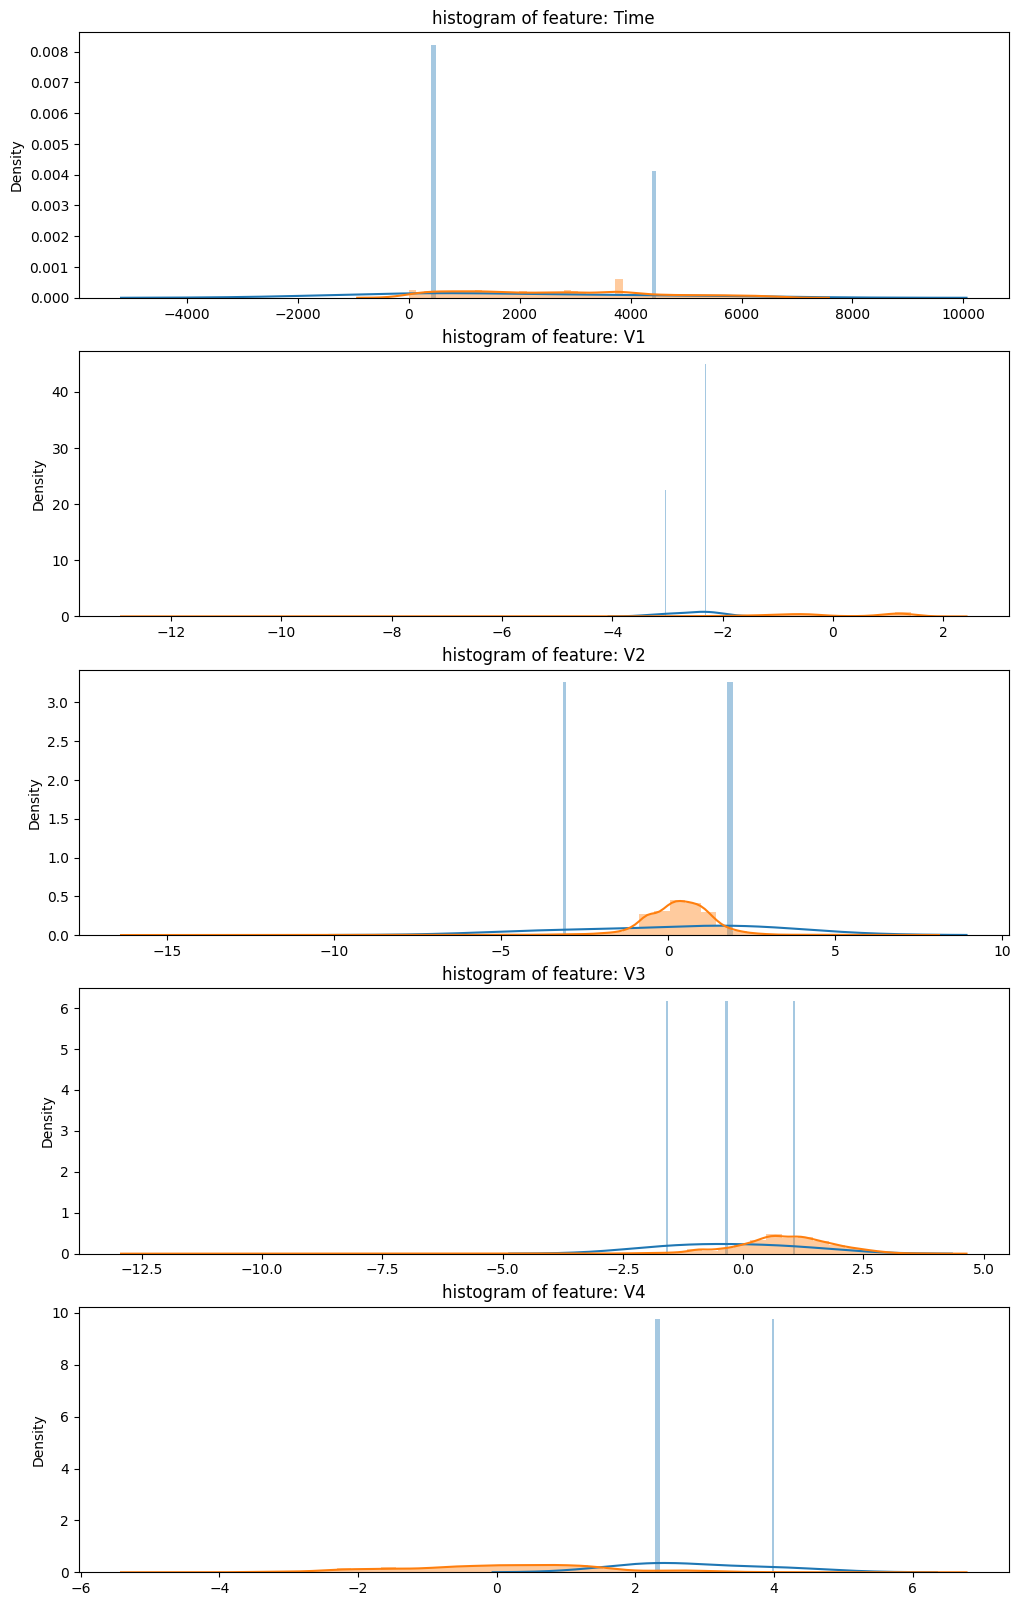

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Total train examples: 4480, total fraud cases: 2.0, equal to 0.00045 of total cases. 
Total test examples: 1494, total fraud cases: nan, equal to nan of total cases. 
Epoch: 0001 cost= 2.071794987 Train auc= 0.961813 Time elapsed= 0:00:00.274636
Epoch: 0002 cost= 2.155148268 Train auc= 0.961813 Time elapsed= 0:00:00.344647
Epoch: 0003 cost= 2.033262014 Train auc= 0.961925 Time elapsed= 0:00:00.391515
Epoch: 0004 cost= 1.651164770 Train auc= 0.962595 Time elapsed= 0:00:00.443371
Epoch: 0005 cost= 1.520666361 Train auc= 0.964828 Time elapsed= 0:00:00.491744
Epoch: 0006 cost= 1.559965968 Train auc= 0.965610 Time elapsed= 0:00:00.536205
Epoch: 0007 cost= 1.312264800 Train auc= 0.967731 Time elapsed= 0:00:00.584785
Epoch: 0008 cost= 1.125123620 Train auc= 0.973649 Time elapsed= 0:00:00.629810
Epoch: 0009 cost= 0.979215920 Train auc= 0.975324 Time elapsed= 0:00:00.678627
Epoch: 0010 cost= 1.118231535 Train auc= 0.977110 Time elapsed= 0:00:00.730617
Optimization Finished!
Model saved in file:

In [1]:
#Exp-1 Credit card fraud detection system
#GURRAM VAMSI _9921005149
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
from datetime import datetime
from sklearn.metrics import roc_auc_score as auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
df = pd.read_csv('creditcard.csv')
df.shape
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0]* 100))
df.head()
df.columns
df.dtypes
plt.figure(figsize=(12,5*4))
gs= gridspec.GridSpec(5,1)
for i, cn in enumerate(df.columns[:5]):
    ax= plt.subplot(gs[i])
    (sns.distplot)(df[cn][df.Class ==1], bins=50)
    sns.distplot(df[cn][df.Class ==0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+ str(cn))
plt.show()
TEST_RATIO = 0.25
df.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * df.shape[0])
train_x = df.iloc[:TRA_INDEX, 1:-2].values
train_y = df.iloc[:TRA_INDEX, -1].values
test_x = df.iloc[TRA_INDEX:, 1:-2].values
test_y = df.iloc[TRA_INDEX:, -1].values
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))
cols_max = []
cols_min = []
for c in range(train_x.shape[1]):
    cols_max.append(train_x[:,c].max())
    cols_min.append(train_x[:,c].min())
    train_x[:, c] = (train_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
    test_x[:, c] = (test_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] = (test_x[:, c] - cols_mean[-1]) / cols_std[-1]
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
n_hidden_1 = 15
n_input = train_x.shape[1]
X = tf.placeholder("float", [None, n_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    # 'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    # 'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    # 'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    # 'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}
# Building the encoder


def encoder(x):
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),biases['encoder_b1']))
    return layer_1


def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                biases['decoder_b1']))
    return layer_1

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
save_model = os.path.join("C:\\Users\\anwar\Desktop\\New folder",'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0] / batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
          train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
          print("Epoch:", '%04d' % (epoch + 1),"cost=", "{:.9f}".format(c),"Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)),"Time elapsed=", "{}".format(datetime.now() - now))
          save_path = saver.save(sess, save_model)
print("Optimization Finished!")
print("Model saved in file: %s" % save_path)
#GURRAM VAMSI_9921005149